In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data from CSV using the Pandas library
df = pd.read_csv('./crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,992.673282,18.026142,True,True,140,8.527341,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,147.998025,29.794042,False,False,106,1.127443,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,986.866331,16.644190,False,True,146,6.517573,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,730.379174,31.620687,True,True,110,7.248251,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [7]:
df_encoded['Fertilizer_Used'] = df['Fertilizer_Used'].map({True: 1.0 , False: 0.0})
df_encoded['Irrigation_Used'] = df['Irrigation_Used'].map({True: 1.0 , False: 0.0})
X = df_encoded.drop(columns=['Yield_tons_per_hectare'])
y = df_encoded[['Yield_tons_per_hectare']]

In [9]:
crops = ["Crop_Barley", "Crop_Cotton", "Crop_Maize", "Crop_Rice", "Crop_Soybean", "Crop_Wheat"]
rice_df = df_encoded[df_encoded["Crop_Rice"] == 1.0]
rice_df = rice_df.drop(crops, axis=1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rice_X = rice_df[['Rainfall_mm', 
        'Temperature_Celsius', 
        'Fertilizer_Used', 
        'Irrigation_Used', 
        'Days_to_Harvest',
        'Region_East',
        'Region_West',
        'Region_North',
        'Region_South',
        'Soil_Type_Clay',
        'Soil_Type_Sandy',
        'Soil_Type_Loam',
        'Soil_Type_Silt',
        'Soil_Type_Peaty',
        'Soil_Type_Chalky',
        'Weather_Condition_Cloudy',
        'Weather_Condition_Rainy',
        'Weather_Condition_Sunny',
         ]]
rice_y = rice_df[["Yield_tons_per_hectare"]]
rice_X_train, rice_X_test, rice_y_train, rice_y_test = train_test_split(rice_X, rice_y, test_size=0.25, random_state=3)
rice_scaler = StandardScaler()
rice_X_train = rice_scaler.fit_transform(rice_X_train)
rice_X_test = rice_scaler.transform(rice_X_test)
rice_linreg = LinearRegression()
rice_linreg.fit(rice_X_train, rice_y_train)
print(rice_linreg.intercept_)
print(rice_linreg.coef_)
rice_predict = rice_linreg.predict(rice_X_test)
rice_mse = mean_squared_error(rice_y_test, rice_predict)
rice_mae = mean_absolute_error(rice_y_test, rice_predict)
rice_r2 = r2_score(rice_y_test, rice_predict)

print("Mean Squared Error:", rice_mse)
print("Mean Absolute Error:", rice_mae)
print("(Accuracy)R² Score:", round(rice_r2*100),'%')

[4.65091445]
[[ 1.30033127e+00  1.42000999e-01  7.48354226e-01  5.99981063e-01
   1.64632931e-03 -3.11640785e+11 -3.12079680e+11 -3.13332454e+11
  -3.12356494e+11 -4.33558535e+11 -4.33242859e+11 -4.34246242e+11
  -4.34436376e+11 -4.31614762e+11 -4.32543207e+11 -5.30364650e+11
  -5.29866125e+11 -5.30981935e+11]]
Mean Squared Error: 0.25193423171935114
Mean Absolute Error: 0.40093230846551975
(Accuracy)R² Score: 91 %


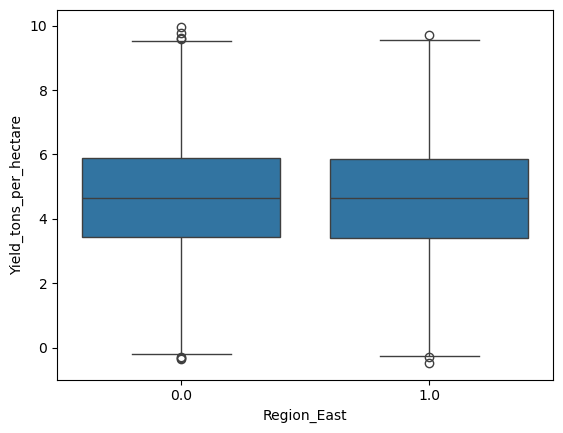

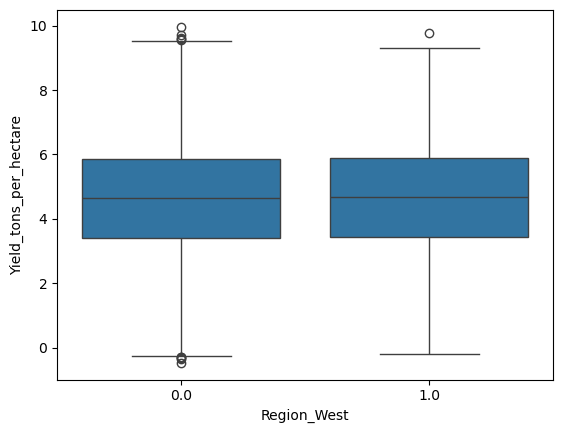

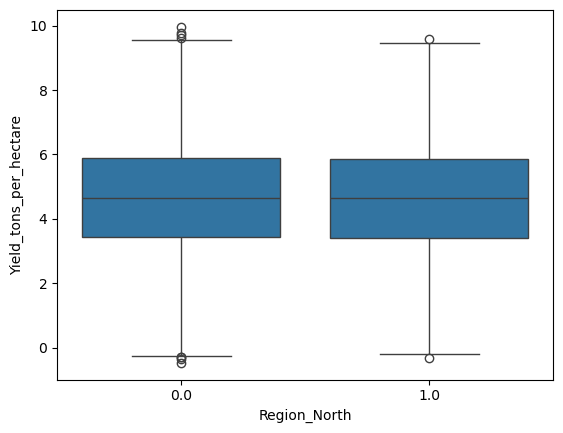

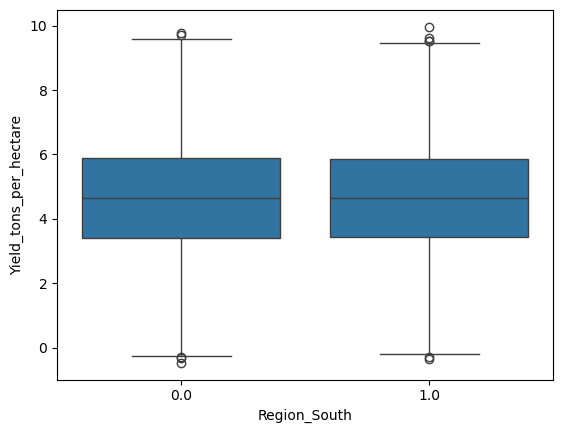

In [13]:
rice_by_region = rice_df[['Region_East','Region_West','Region_North','Region_South',"Yield_tons_per_hectare"]]
for column in ['Region_East','Region_West','Region_North','Region_South']:
    sns.boxplot(x=column,y="Yield_tons_per_hectare", data=rice_by_region)
    plt.show()

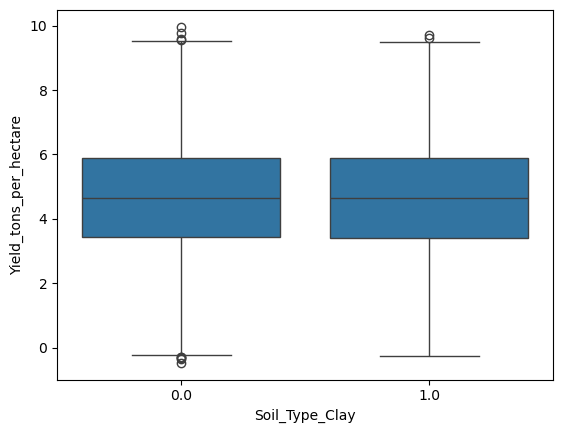

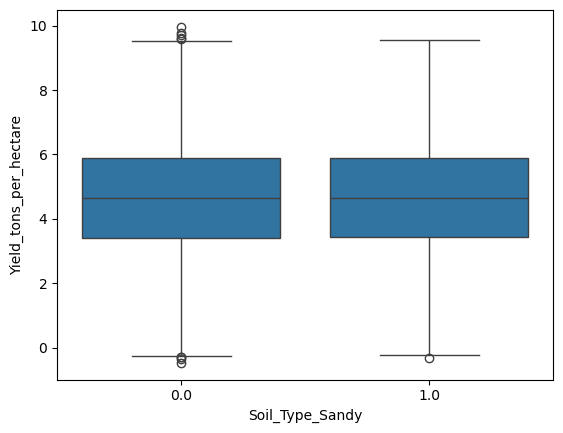

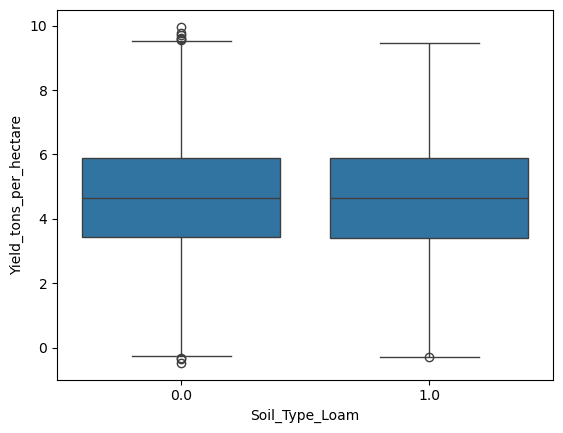

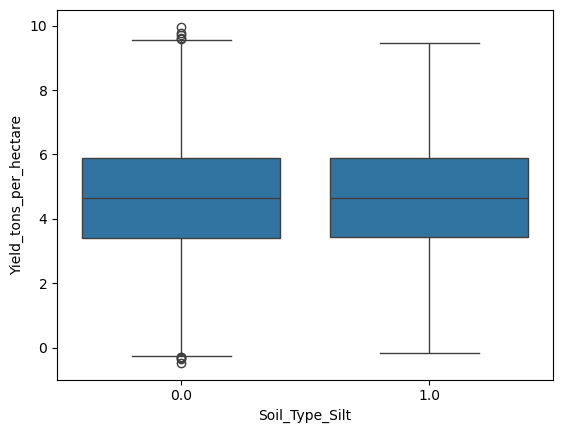

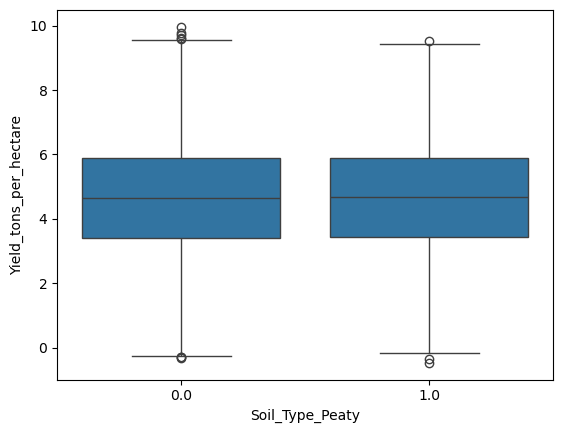

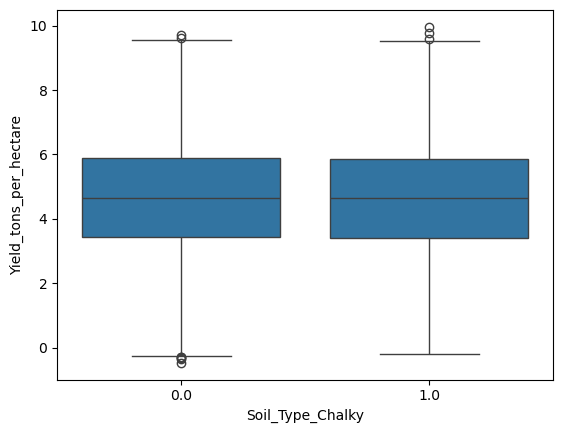

In [15]:
rice_by_soil = rice_df[['Soil_Type_Clay','Soil_Type_Sandy','Soil_Type_Loam','Soil_Type_Silt','Soil_Type_Peaty','Soil_Type_Chalky',"Yield_tons_per_hectare"]]
for column in ['Soil_Type_Clay','Soil_Type_Sandy','Soil_Type_Loam','Soil_Type_Silt','Soil_Type_Peaty','Soil_Type_Chalky']:
    sns.boxplot(x=column,y="Yield_tons_per_hectare", data=rice_by_soil)
    plt.show()

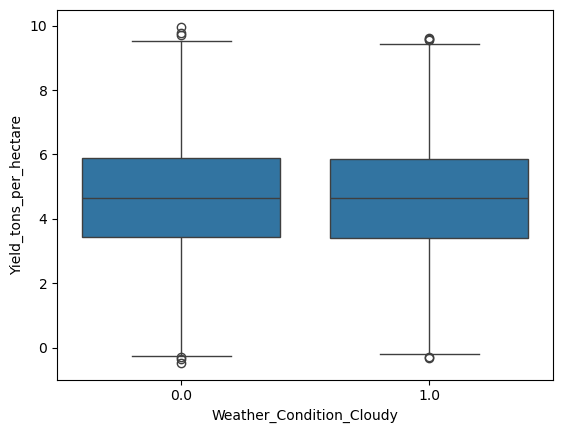

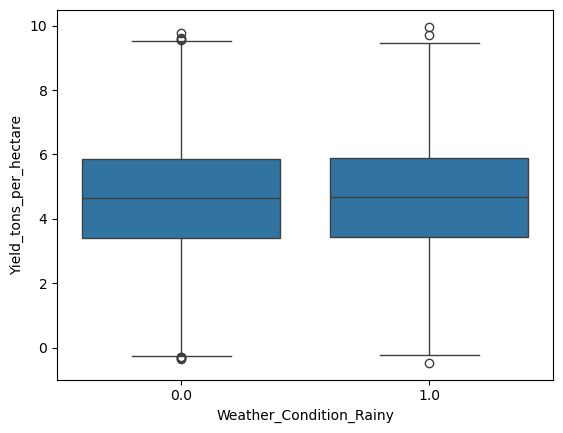

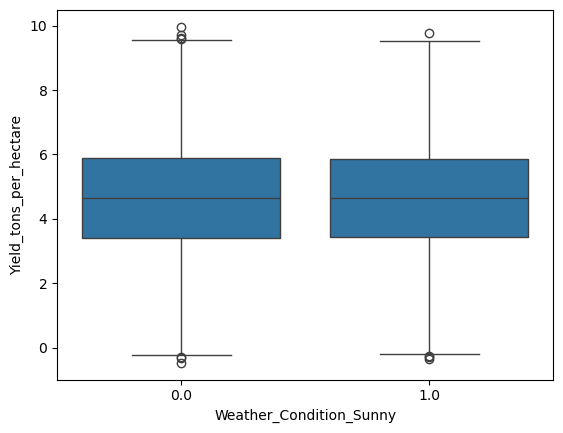

In [17]:
rice_by_weather = rice_df[['Weather_Condition_Cloudy','Weather_Condition_Rainy','Weather_Condition_Sunny',"Yield_tons_per_hectare"]]
for column in ['Weather_Condition_Cloudy','Weather_Condition_Rainy','Weather_Condition_Sunny']:
    sns.boxplot(x=column,y="Yield_tons_per_hectare", data=rice_by_weather)
    plt.show()